len(samples): 3132
len(set(labels)): 29
train_Y
Number 21: 95, Number 22: 89, Number 28: 74, Number 0: 89, Number 6: 91, Number 5: 85, Number 19: 85, Number 15: 84, Number 3: 86, Number 9: 88, Number 11: 86, Number 10: 83, Number 1: 82, Number 8: 84, Number 14: 92, Number 27: 85, Number 16: 84, Number 2: 84, Number 4: 92, Number 25: 86, Number 26: 92, Number 24: 89, Number 13: 86, Number 7: 91, Number 12: 86, Number 18: 83, Number 20: 83, Number 23: 83, Number 17: 88
test_Y
Number 11: 22, Number 16: 24, Number 2: 24, Number 13: 22, Number 1: 26, Number 24: 19, Number 26: 16, Number 0: 19, Number 23: 25, Number 5: 23, Number 19: 23, Number 3: 22, Number 18: 25, Number 28: 34, Number 25: 22, Number 4: 16, Number 22: 19, Number 6: 17, Number 14: 16, Number 15: 24, Number 12: 22, Number 17: 20, Number 20: 25, Number 21: 13, Number 8: 24, Number 7: 17, Number 27: 23, Number 9: 20, Number 10: 25


Using cache found in /home/mambauser/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 1 13.47s: train loss 1.940182, train acc 0.389, test loss 1.539309, test acc 0.477
Epoch 2 9.18s: train loss 0.926987, train acc 0.694, test loss 0.731978, test acc 0.753
Epoch 3 9.16s: train loss 0.443767, train acc 0.873, test loss 0.491794, test acc 0.833
Epoch 4 9.06s: train loss 0.255910, train acc 0.933, test loss 0.382448, test acc 0.879
Epoch 5 9.09s: train loss 0.188001, train acc 0.950, test loss 0.340173, test acc 0.903
Epoch 6 9.20s: train loss 0.203301, train acc 0.945, test loss 0.611825, test acc 0.813
Epoch 7 9.19s: train loss 0.143360, train acc 0.962, test loss 0.479740, test acc 0.855
Epoch 8 9.38s: train loss 0.103963, train acc 0.972, test loss 0.077409, test acc 0.976
Epoch 9 9.28s: train loss 0.157647, train acc 0.959, test loss 0.133928, test acc 0.954
Epoch 10 10.03s: train loss 0.110852, train acc 0.969, test loss 0.193171, test acc 0.943
Epoch 11 9.99s: train loss 0.043633, train acc 0.990, test loss 0.211531, test acc 0.935
Epoch 12 9.90s: train loss 0

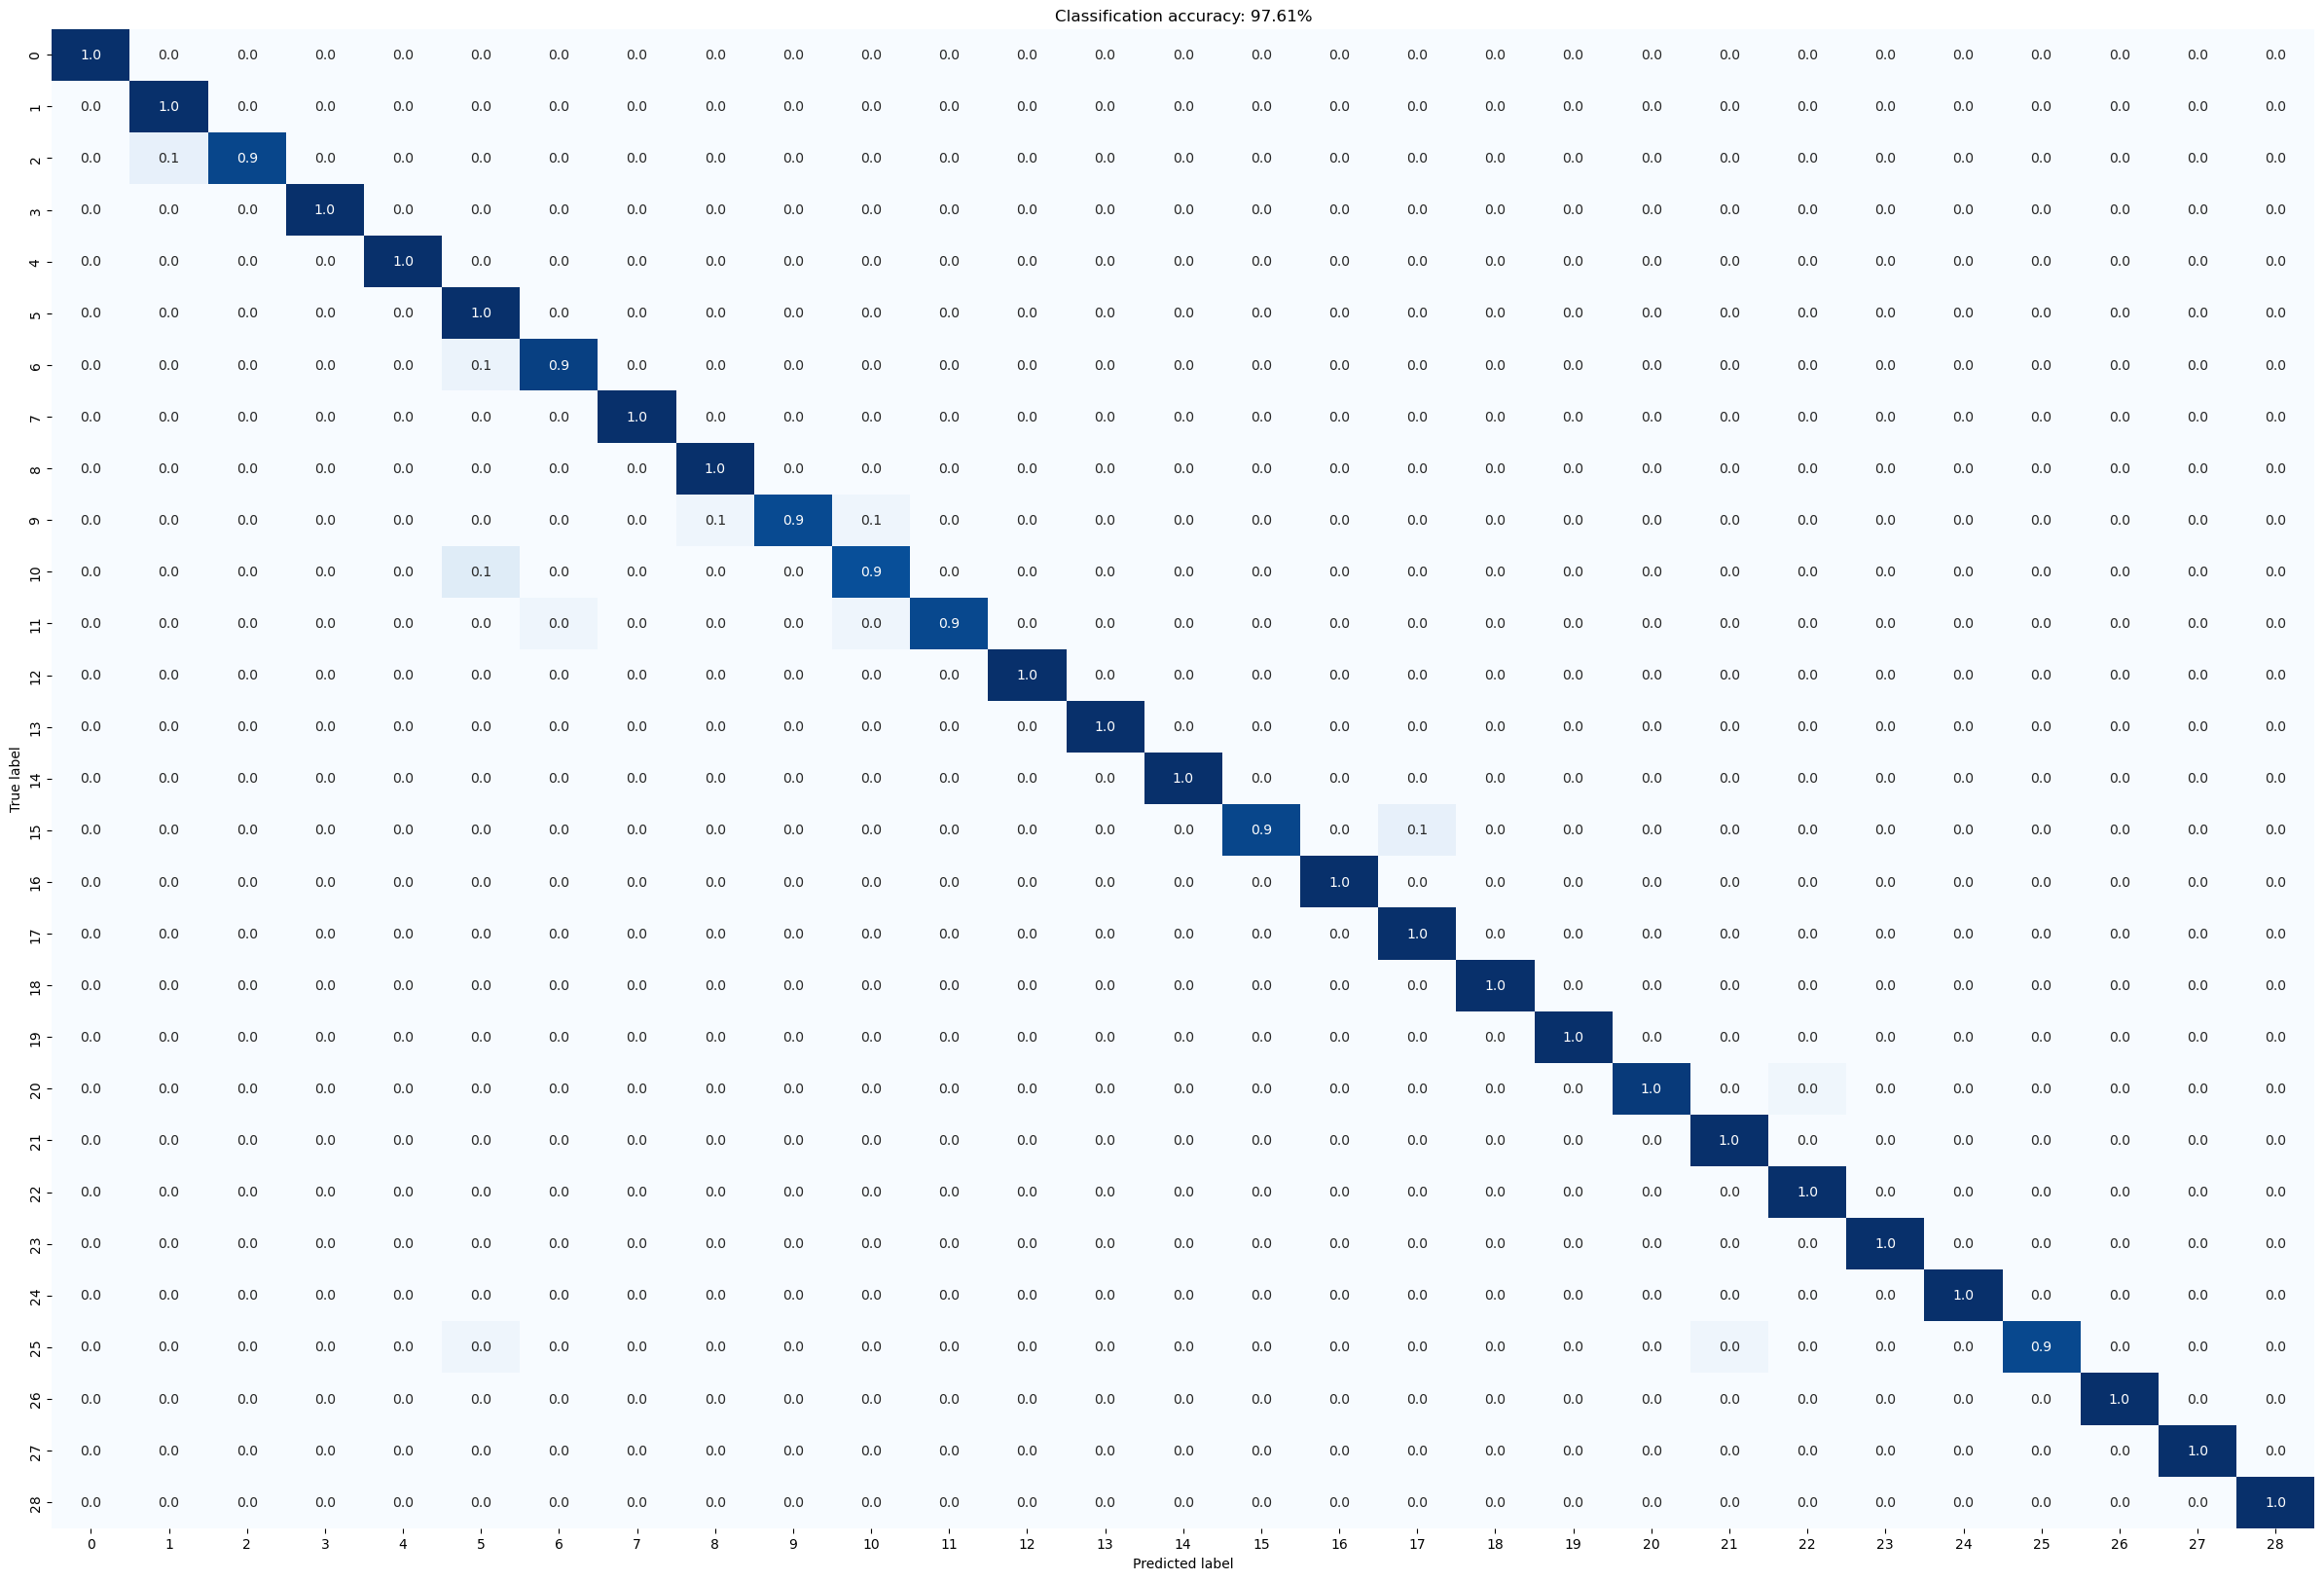

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

from ClassifyFunc.train import Trainer
from ClassifyFunc.models import CustomResNet
from ClassifyFunc.data_preprocess import get_loader
from ClassifyFunc.data_read import get_data
from ClassifyFunc.visualization import visualize_results

folder_path = r'/home/mambauser/YinnanTest3D'
in_channels = 3

samples, labels = get_data(
    folder_path=folder_path,
    in_channels=in_channels,
    # wordIndex=list(range(30)),
    fileIndex=list(range(0,10))+list(range(12,30))+list(range(32,40)),
    # personIndex=[1],
    txIndex=[0,1,2],
)

print("len(samples): {}".format(len(samples)))
print("len(set(labels)): {}".format(len(set(labels))))

trainloader, testloader = get_loader(samples=samples, labels=labels)

# classifier
# classifier = MultiInResNet(num_inputs=NUM_INPUTS,
#                            num_classes=10,
#                            num_in_convs=[1],
#                            in_channels=[3],
#                            out1_channels=[3],
#                            model='resnet18')
classifier = CustomResNet(in_channels=in_channels,
                          num_classes=len(set(labels)),
                          weights=models.ResNet18_Weights.DEFAULT,
                          model='resnet18')

# optimizers
lr = 1e-3
betas = (.5, .99)
optimizer = optim.Adam(classifier.parameters(), lr=lr, betas=betas)
criterion = nn.CrossEntropyLoss()

# train model
NUM_INPUTS = 1
epochs = 30

trainer = Trainer(
    num_inputs=NUM_INPUTS,
    classifier=classifier,
    optimizer=optimizer,
    criterion=criterion,
    print_every=1,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    use_cuda=torch.cuda.is_available(),
    use_scheduler=False)

trainer.train(trainloader=trainloader, testloader=testloader, epochs=epochs)

visualize_results(trainer=trainer)

torch.save(classifier.state_dict(), 'model.pth')


len(samples): 348
len(set(labels)): 29


Using cache found in /home/mambauser/.cache/torch/hub/pytorch_vision_v0.10.0
/tmp/ipykernel_218289/4038383981.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  classifier

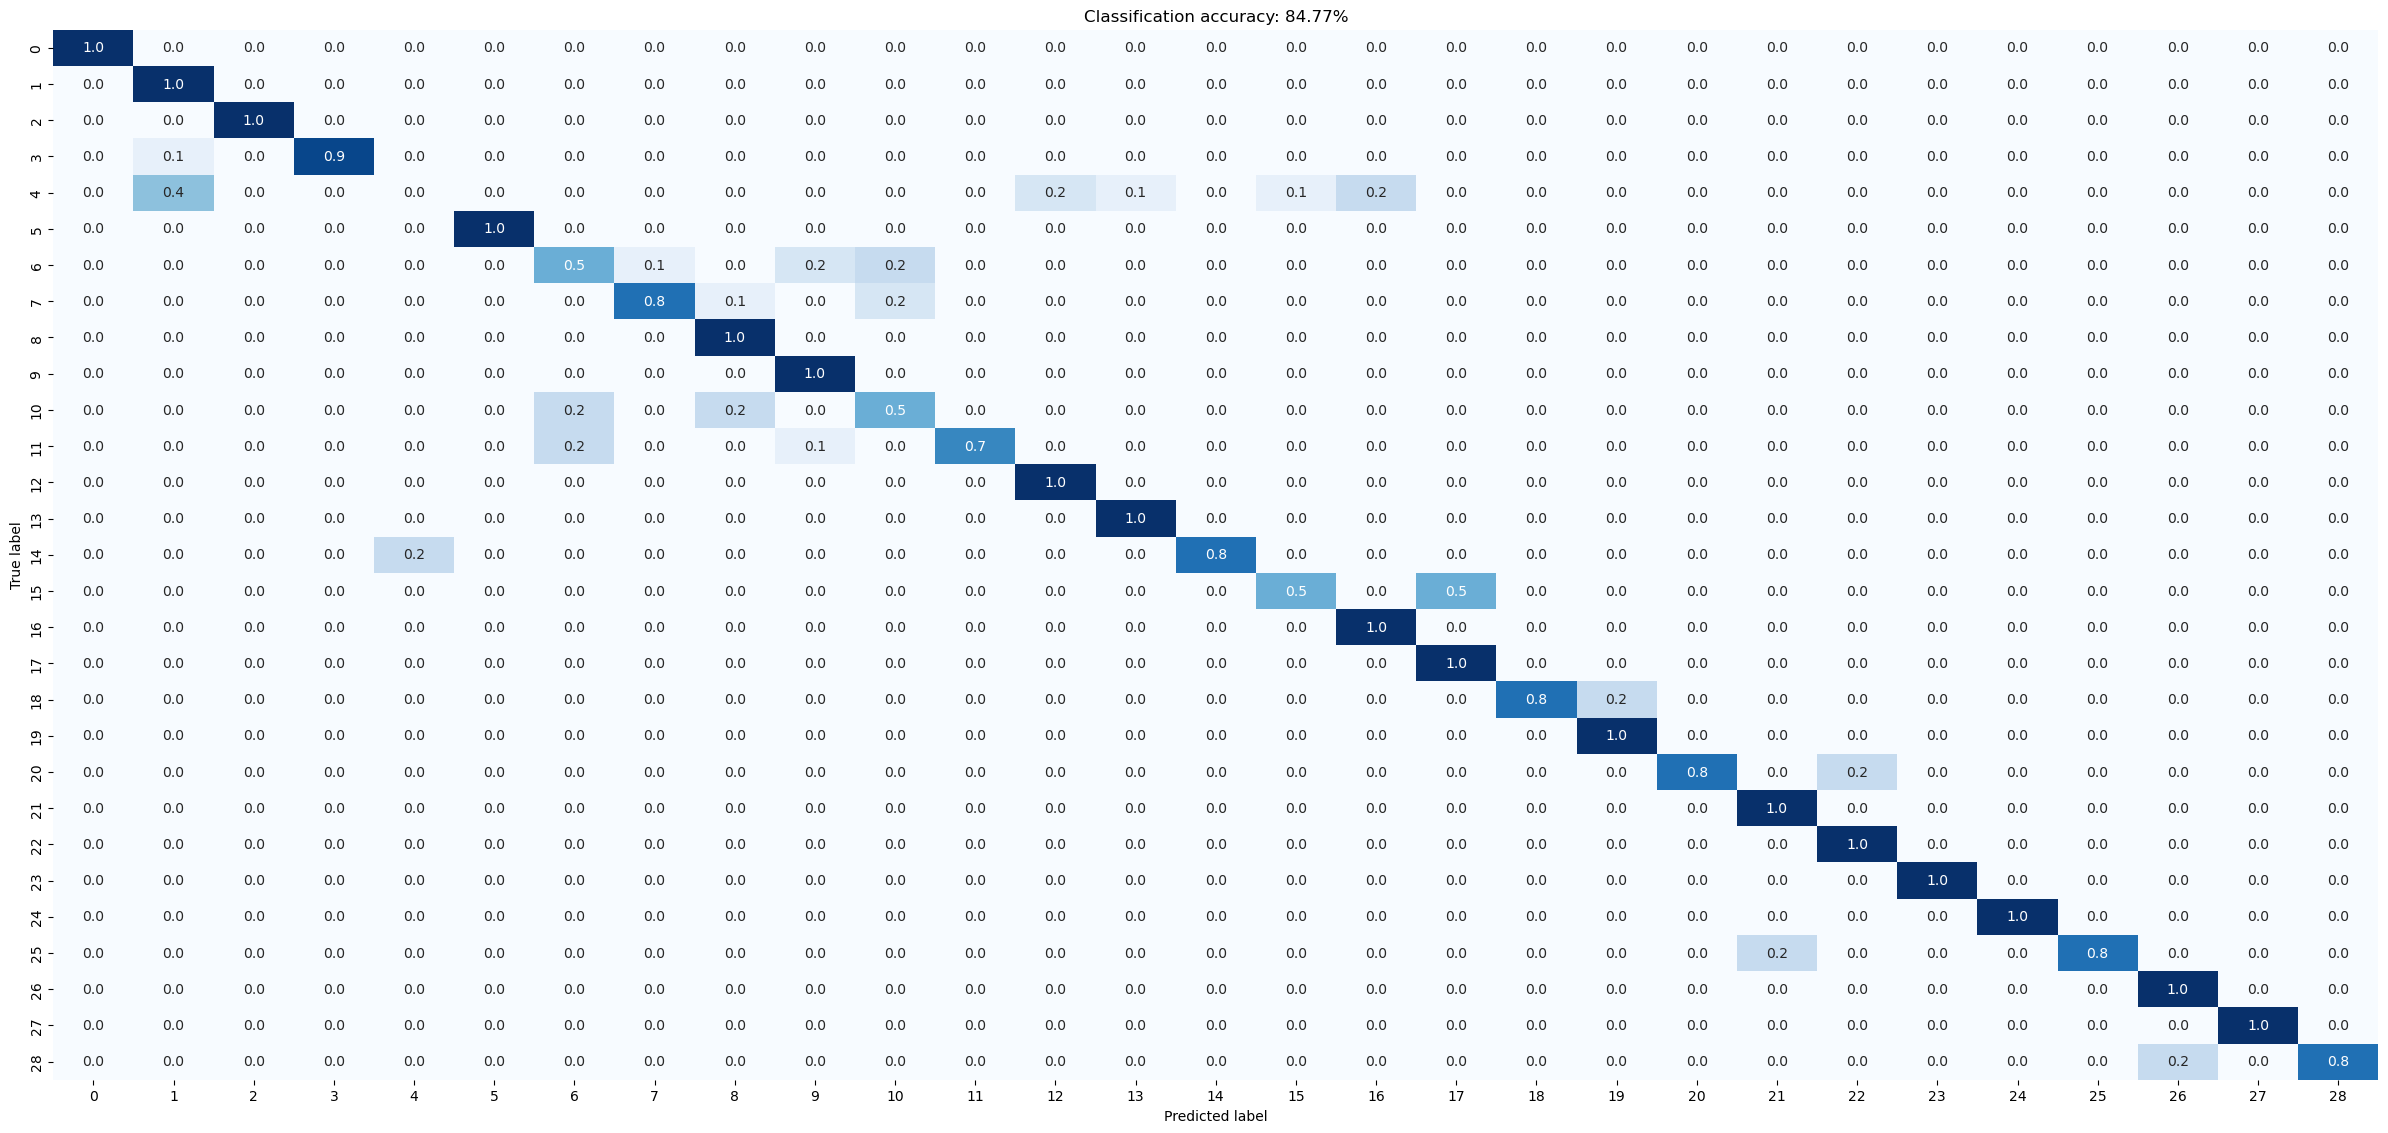

In [2]:
import torch
from ClassifyFunc.models import CustomResNet
from ClassifyFunc.data_read import get_data
from tqdm import tqdm

from ClassifyFunc.data_preprocess import get_loader_all
from ClassifyFunc.visualization import visualize_predict

# Load data
folder_path = r'/home/mambauser/YinnanTest3D'
in_channels = 3

samples, labels = get_data(
    folder_path=folder_path,
    in_channels=in_channels,
    # wordIndex=list(range(30,35)),
    fileIndex=[10,11,30,31],
    # personIndex=[1],
    # txIndex=[0,4,8],
)

print("len(samples): {}".format(len(samples)))
print("len(set(labels)): {}".format(len(set(labels))))

# Create dataset and dataloader
dataloader = get_loader_all(samples, labels)

# Load model
model_path = 'model.pth'  # Path to your saved model
classifier = CustomResNet(in_channels=in_channels,
                          num_classes=len(set(labels)),
                          model='resnet18')
classifier.load_state_dict(torch.load(model_path))
classifier.eval()

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier.to(device)

# Prepare for evaluation
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in tqdm(dataloader, desc='Processing batches'):
        images, labels = images.to(device), labels.to(device)
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

visualize_predict(all_labels, all_preds)
